import packages and self written classes and functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from neural_network import *
from optimizers import *
from mnist_functions import *
import sys

import warnings
warnings.filterwarnings("ignore")

Load and preprocess data

In [4]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')

# Extract data (features) and target (labels)
X = mnist.data
y = mnist.target

#one hot encoding
encoder = OneHotEncoder(sparse_output=False)

# 4. Fit and transform the labels
y_onehot = encoder.fit_transform(y.reshape(-1, 1))
# Scaling
X = X/255.0

output_size = 10
# train test split

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y_onehot, test_size=10000, random_state=42
)

# Split train+val into train (50k) and validation (10k)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=10000, random_state=42
)

Tune learning rate and regularization parameter simultaneously

On the x axis are the different regularization parameters and on the y axis are different learning rates


time
            0.000100    0.001778    0.031623    0.562341    10.000000
0.000100   105.689059   96.489025   91.586344   96.088195  102.430686
0.001778   105.273119   99.838081  100.625830  100.378099  104.167383
0.031623   101.022932  101.723598  100.450255  101.266452  100.091009
0.562341   108.492359  102.846634  101.270027  101.959697  100.948789
10.000000   94.852533   96.484314   95.873382   99.989767  100.458115
result
           0.000100   0.001778   0.031623   0.562341   10.000000
0.000100      0.7071     0.7000     0.7141     0.6478     0.2640
0.001778      0.9146     0.9170     0.9445     0.9661     0.3950
0.031623      0.9652     0.9736     0.9707     0.9506     0.4051
0.562341      0.1028     0.0956     0.1158     0.1158     0.0885
10.000000     0.0997     0.0997     0.0997     0.0988     0.1070


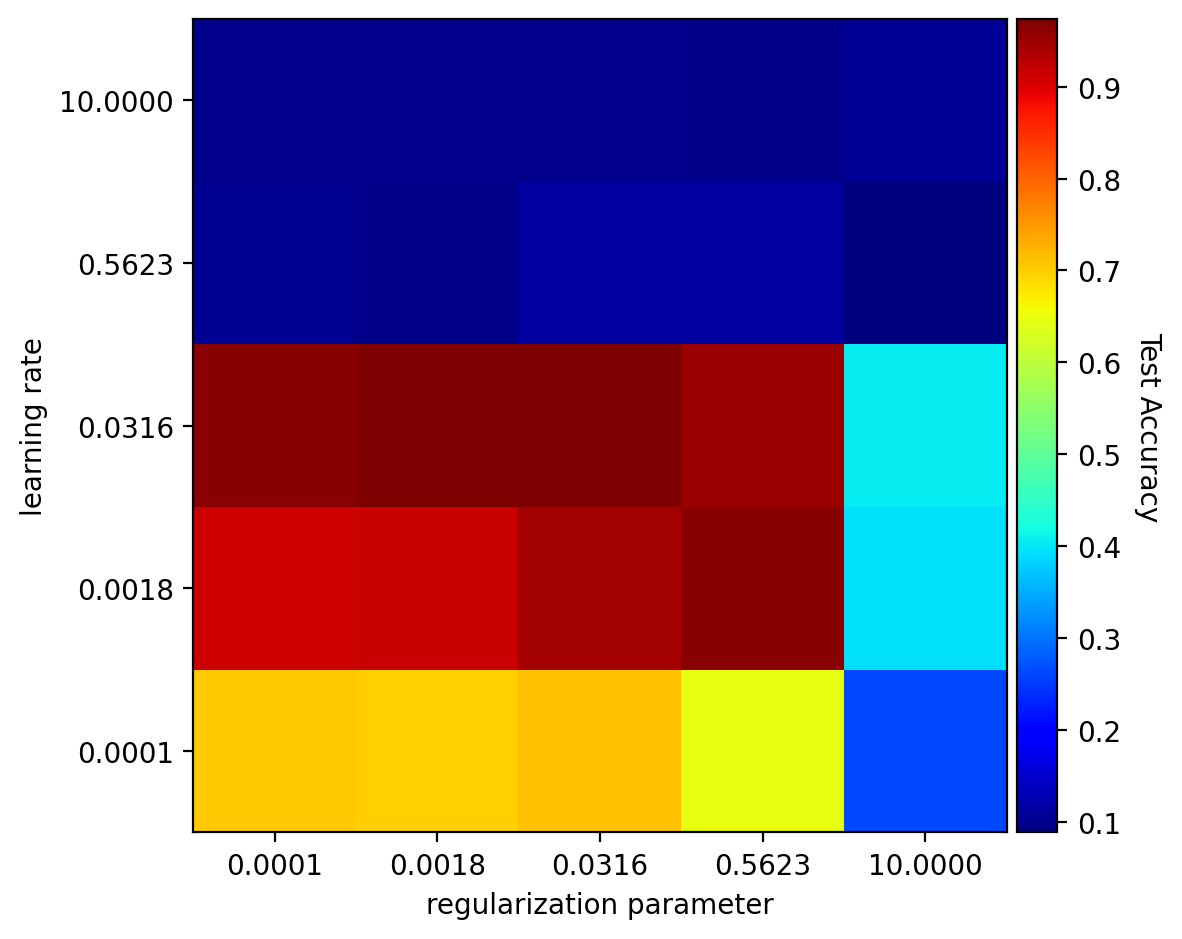

,0.000100,0.001778,0.031623,0.562341,10.000000
0.000100,0.7071,0.7000,0.7141,0.6478,0.2640
0.001778,0.9146,0.9170,0.9445,0.9661,0.3950
0.031623,0.9652,0.9736,0.9707,0.9506,0.4051
0.562341,0.1028,0.0956,0.1158,0.1158,0.0885
10.000000,0.0997,0.0997,0.0997,0.0988,0.1070


In [3]:
np.random.seed(472)
layer_output_sizes = [128, 64, 32, output_size]
activation_funcs = [ReLU, sigmoid, sigmoid, softmax]
list_lambda = np.logspace(-4,1,5)
list_learning_rates = np.logspace(-4,1,5) 
epochs = 100 #Lars 100
tune_learning_rate_reg(X_train, y_train, X_val, y_val, layer_output_sizes, activation_funcs, list_learning_rates, list_lambda, epochs=epochs)

Compare different activation functions

On the x axis are different regularization parameters and on the y axis the different models

model 1: ReLU, sigmoid, sigmoid

model 2: ReLU, sigmoid, ReLU

model 3: sigmoid, sigmoid, sigmoid


In [13]:
np.random.seed(210)
layer_output_sizes = [128, 64, 32, output_size]
list_activation_funcs = [[ReLU, sigmoid, sigmoid, softmax], [ReLU, sigmoid, ReLU, softmax], [sigmoid, sigmoid, sigmoid, softmax]]
list_model_numbers = [1,2,3]
list_regularization = np.logspace(-4,1,5)
epochs = 100 #Lars 100
compare_activation_reg(X_train, y_train, X_val, y_val, layer_output_sizes, list_activation_funcs, list_model_numbers, list_regularization, epochs)

--------------------------------------------------
times:
    0.000100    0.001778    0.031623    0.562341    10.000000
1  113.301163  109.990289  107.917455  109.693733  131.820873
2  109.878083  111.820235  108.649069  105.605662  125.083010
3  131.853511  129.417805  130.356184  125.232157  141.645008
accuraccy
   0.000100   0.001778   0.031623   0.562341   10.000000
1     0.9666     0.9713     0.9760     0.9526     0.2948
2     0.9616     0.9663     0.9650     0.9572     0.8030
3     0.9648     0.9742     0.9744     0.9207     0.1158
--------------------------------------------------
accuraccy of best learning rate
1    0.9760
2    0.9663
3    0.9744
dtype: float64


,0.000100,0.001778,0.031623,0.562341,10.000000
1,0.9666,0.9713,0.9760,0.9526,0.2948
2,0.9616,0.9663,0.9650,0.9572,0.8030
3,0.9648,0.9742,0.9744,0.9207,0.1158


Plot errors per epoch

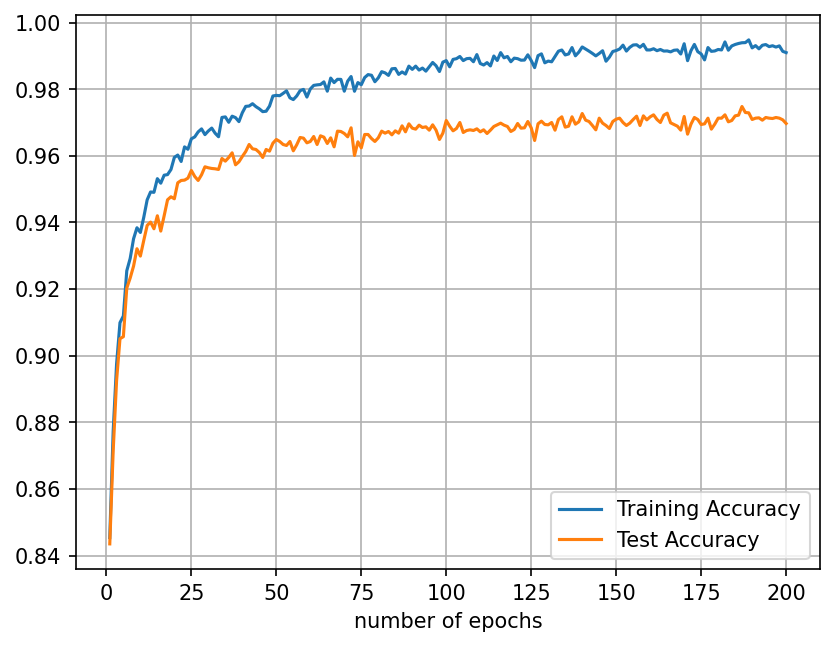

In [5]:
np.random.seed(120)
layer_output_sizes = [128, 64, output_size]
activation_funcs = [ReLU, sigmoid, softmax]
lmbda = 0
epochs= 200 #Lars 200
compute_errors_per_epoch(X_train, y_train, X_val, y_val, layer_output_sizes, activation_funcs, lmbda, epochs)

Compare the number of hidden layers while using regularization

On the x axis are different regularization parameters and on the y axis the different models

model 1: 1 hidden layer

model 2: 2 hidden layer

model 3: 3 hidden layer

model 4: 4 hidden layer


In [6]:
np.random.seed(123)
list_layer_output_sizes = [[128, output_size], [128, 64, output_size], [128, 64, 32, output_size], [128, 64, 32, 16, output_size]]   # define number of nodes in layers
list_activation_funcs = [[ReLU, softmax], [ReLU, sigmoid, softmax], [ReLU, sigmoid, sigmoid, softmax], [ReLU, sigmoid, sigmoid, sigmoid, softmax]]    # activation functions
number_hidden_layers =[1,2,3,4]
list_regularization = np.logspace(-4,1,7)
list_regularization = np.insert(list_regularization,0,0)
epochs=100 #Lars 100
results_hidden_layer_reg = tune_hidden_layers_reg(X_train, y_train, X_val, y_val, list_layer_output_sizes, list_activation_funcs, number_hidden_layers, list_regularization, epochs=epochs)

--------------------------------------------------
times:
    0.000000    0.000100    0.000681    0.004642    0.031623    0.215443   \
1   70.916243   71.612632   72.633434   71.572463   73.864782   72.125941   
2   88.260341   89.626145   87.814259   87.864779   87.851210   89.207491   
3   95.553503   97.185263   96.603732   94.501784   94.201782   94.725375   
4  100.411420  101.133779  101.370075  100.171440  100.905899  100.859988   

   1.467799   10.000000  
1  72.050216  71.668782  
2  88.074412  88.040560  
3  94.618497  96.070756  
4  98.732633  99.781168  
accuraccy
   0.000000   0.000100   0.000681   0.004642   0.031623   0.215443   \
1     0.9625     0.9636     0.9640     0.9677     0.9732     0.9703   
2     0.9686     0.9643     0.9693     0.9712     0.9726     0.9648   
3     0.9640     0.9693     0.9716     0.9731     0.9736     0.9665   
4     0.9676     0.9659     0.9687     0.9730     0.9741     0.9658   

   1.467799   10.000000  
1     0.9378     0.8852  
2     0.

Compare number of nodes while using regularization

On the x axis are different regularization parameters and on the y axis the different models

model 512: 512 and 256 nodes

model 256: 256 and 128 nodes

model 128: 128 and 64 nodes

model 64: 64 and 32 nodes


In [7]:
np.random.seed(123)
list_layer_output_sizes = [[512, 256, output_size], [256, 128, output_size], [128, 64, output_size], [64, 32, output_size], [32, 16, output_size]]   # define number of nodes in layers
activation_funcs = [ReLU, sigmoid, softmax]
list_highest_size=[512, 256, 128, 64, 32]
list_regularization = np.logspace(-4,1,7)
list_regularization = np.insert(list_regularization,0,0)
epochs = 100 #Lars 100
results_nodes_reg = tune_number_nodes_reg(X_train, y_train, X_val, y_val, list_layer_output_sizes, activation_funcs, list_highest_size, list_regularization, epochs=epochs)

--------------------------------------------------
times:
      0.000000    0.000100    0.000681    0.004642    0.031623    0.215443   \
512  550.093205  548.595702  526.880205  525.535838  523.602200  520.977085   
256  223.608302  225.471526  235.208342  223.896646  234.490094  222.339030   
128   85.596469   95.000835   86.636432   85.302529   93.779064   99.562421   
64    50.037194   50.761509   50.910563   51.169799   51.216307   53.148858   
32    37.530141   37.846771   38.043908   38.322230   38.483022   37.998408   

      1.467799    10.000000  
512  528.050601  513.340810  
256  219.836222  234.097616  
128   85.908474   88.671801  
64    63.107776   50.774885  
32    37.945761   37.703188  
accuraccy
     0.000000   0.000100   0.000681   0.004642   0.031623   0.215443   \
512     0.9616     0.9641     0.9738     0.9774     0.9770     0.9674   
256     0.9675     0.9721     0.9734     0.9757     0.9746     0.9710   
128     0.9663     0.9692     0.9680     0.9730     0.9753

Compare the best models so far

model 1: 256 128 64

model 2: 128 64 32

model 3: 256 128


In [11]:
np.random.seed(213)
list_numbers = [1,2,3]
list_regularization = np.logspace(-3,-1, 7)
list_layer_output_sizes = [[256, 128, 64, output_size], [128, 64, 32, output_size],[256, 128, output_size]]
list_activation_funcs = [[ReLU, sigmoid, sigmoid, softmax], [ReLU, sigmoid, sigmoid, softmax], [ReLU, sigmoid, softmax]]
epochs = 100 #Lars 100
compare_best_models(X_train, y_train, X_val, y_val, list_layer_output_sizes, list_activation_funcs, list_numbers, list_regularization, epochs)


--------------------------------------------------
times:
     0.001000    0.002154    0.004642    0.010000    0.021544    0.046416  \
1  265.209557  249.437317  261.606495  251.774488  261.123201  250.244503   
2  109.165981  115.632815  105.026808  112.680665  127.897156  115.199207   
3  256.395016  266.163141  248.315620  295.509982  252.512351  275.841320   

     0.100000  
1  285.828073  
2  118.049400  
3  248.729390  
accuraccy
   0.001000  0.002154  0.004642  0.010000  0.021544  0.046416  0.100000
1    0.9692    0.9728    0.9738    0.9701    0.9766    0.9758    0.9692
2    0.9726    0.9673    0.9753    0.9739    0.9766    0.9691    0.9734
3    0.9733    0.9743    0.9782    0.9809    0.9778    0.9704    0.9706
--------------------------------------------------
accuraccy of best learning rate
1    0.9766
2    0.9766
3    0.9809
dtype: float64


Train and evaluate the best model

accuraccy 0.9772


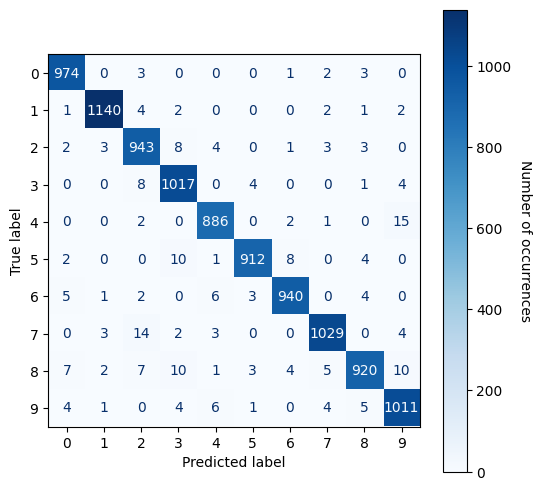

In [5]:
np.random.seed(329)
layer_output_sizes = [128, 64, 32, output_size]
activation_funcs = [ReLU, sigmoid, sigmoid, softmax]
lmbda = 0.021544
epochs = 100 #Lars 100

layer_output_sizes = [512, 256, output_size]
activation_funcs = [ReLU, sigmoid, softmax]
lmbda = 0.004642
train_and_evaluate_best_model(X_trainval, y_trainval, X_test, y_test, layer_output_sizes, activation_funcs, lmbda, epochs)

plot images of the mnist dataset

In [ ]:
#we want to find misclassified and therefore train a nn first
_, input_size = np.shape(X_train)
_, output_size = np.shape(y_train)
cost_fnc = cross_entropy                                  # cost function
cost_der = cross_entropy_der
layer_output_sizes = [128, 64, 32, output_size]
activation_funcs = [ReLU, sigmoid, sigmoid, softmax]
activation_derivatives = get_activation_ders(activation_funcs)
ffnn = NeuralNetwork(
        input_size, layer_output_sizes, activation_funcs, 
        activation_derivatives, cost_fnc, cost_der, lmbda, 'L2'
        )


ffnn.train_network(X_train, y_train, batches =100, optimizer=Adam(0.03), epochs =epochs, printer=False, save_mses =True, x_test=X_test, y_test =y_test)
y_pred = np.argmax(ffnn.predict(X_test), axis =1)
misclassified_idx = np.where(y_pred != np.argmax(y_test, axis =1))[0]


True: 3, Predicted: 5


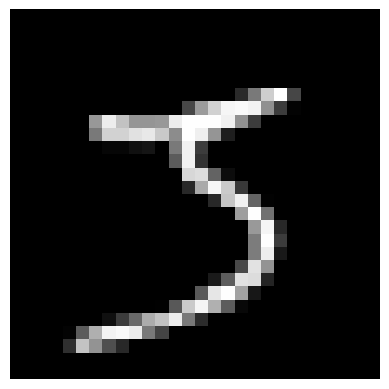

In [43]:
#misclassified image
index = misclassified_idx[3]
plt.imshow(X_test[index].reshape(28,28), cmap='gray')
print(f"True: {np.argmax(y_test[index])}, Predicted: {y_pred[index]}")
plt.axis('off')
plt.show()

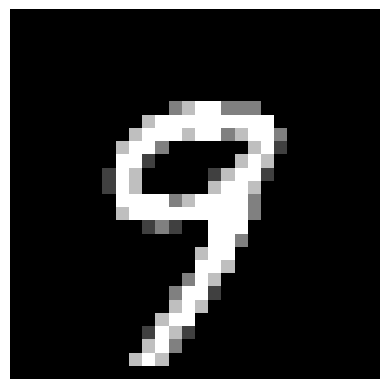

In [46]:
#nice image
plt.imshow(X[index].reshape(28,28), cmap='gray')
plt.axis('off')
plt.show()